# Visual variables - participate

In [69]:
import os
from dotenv import load_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import colorsys

# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [70]:
load_dotenv()

data_folder = os.getenv('DATA_FOLDER')

## Coordinate Systems

In [71]:
# Generate data
rng = np.random.default_rng(42)
x = rng.lognormal(size=200)
y = x + rng.normal(scale=5 * (x / np.max(x)), size=200)

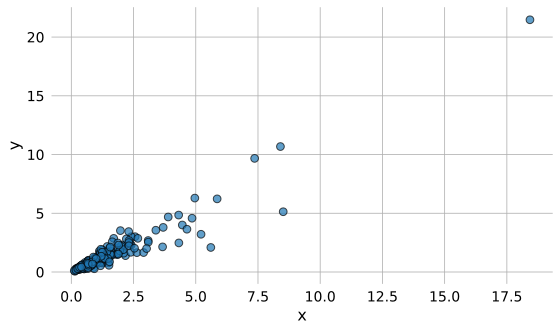

In [72]:
fig, ax = plt.subplots(figsize = (9, 5))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
# Enable minor and major gridlines
ax.grid(True, which='both')

ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, labelsize=14)
ax.set_axisbelow(True)

plt.show()

**To do**
1. Change the scale on the x-axis to logarithmic
2. Change the scale on the y-axis to logarithmic
3. Plot the same data with both axes on a logarithmic scale

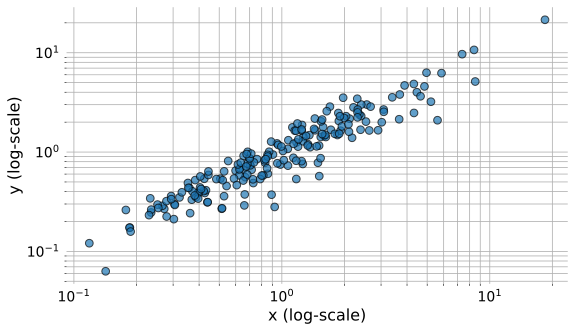

In [73]:
fig, ax = plt.subplots(figsize = (9, 5))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
# Set x-axis to logarithmic scale
ax.set_xscale('log')
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('x (log-scale)', fontsize=16)
ax.set_ylabel('y (log-scale)', fontsize=16)
# Enable minor and major gridlines
ax.grid(True, which='both')

ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, labelsize=14)
ax.set_axisbelow(True)

plt.show()

## Color

In [74]:
# Some helper functions
def plot_color_gradients(cmap_list, patchh=0.22):
    
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * patchh
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    # axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

# plot a grid of square patches from a list of color definitions
def plot_color_grid(colors):
    _, ax = plt.subplots(1, 1, figsize=(len(colors), 1))

    for i, color in enumerate(colors):
        rect = mpl.patches.Rectangle((i, 0), 1, 1, facecolor=color)
        ax.add_patch(rect)

    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.axis('off')  # Hide axes
    plt.show()

def rgb_adjust_ls(rgb, l=None, s=None):
    c = colorsys.rgb_to_hls(*rgb)
    if l==None:
        l=c[1]
    if s==None:
        s=c[2]
    return colorsys.hls_to_rgb(c[0], max(0.0, min(1.0, l)), max(0.0, min(1.0, s)))

Named colors in matplotlib:

In [75]:
# mpl.colors.BASE_COLORS.keys()
# mpl.colors.TABLEAU_COLORS.keys()
mpl.colors.CSS4_COLORS.keys()
# mpl.colors.XKCD_COLORS.keys()

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [76]:
mpl.colors.to_rgb('mediumorchid')

(0.7294117647058823, 0.3333333333333333, 0.8274509803921568)

![Munstell Color System. Source: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/d/d5/Munsell-system.svg)  
Source: Wikipedia - https://upload.wikimedia.org/wikipedia/commons/d/d5/Munsell-system.svg

* Hue: another word for color
* Lightness (value): the relative degree of black or white mixed with a given hue
* Saturation (chroma): the intensity or purity of a hue

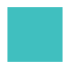

In [77]:
plot_color_grid([colorsys.hls_to_rgb(0.5,0.5,0.5)])

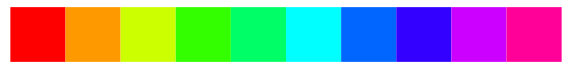

In [78]:
plot_color_grid([colorsys.hls_to_rgb(h,0.5,1.0) for h in np.linspace(0, 0.9, 10)])

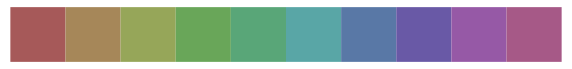

In [79]:
plot_color_grid([colorsys.hls_to_rgb(h,0.5,0.3) for h in np.linspace(0, 0.9, 10)])

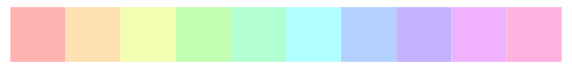

In [80]:
plot_color_grid([colorsys.hls_to_rgb(h,0.85,1) for h in np.linspace(0, 0.9, 10)])


In [81]:
mpl.colors.to_rgb('mediumorchid')

(0.7294117647058823, 0.3333333333333333, 0.8274509803921568)

In [82]:
colorsys.rgb_to_hls(*mpl.colors.to_rgb('mediumorchid'))

(0.8002645502645502, 0.580392156862745, 0.5887850467289718)

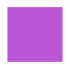

In [83]:
plot_color_grid([mpl.colors.to_rgb('mediumorchid')])

A hex color code is a 6‑symbol code made of up to three 2‑symbol elements: `#rrggbb`

Where rr (red), gg (green) and bb (blue) are hexadecimal integers between `00` (0) and `ff` (255), specifying the intensity of the color.

Hexadecimal uses sixteen distinct symbols, most often the symbols "0"–"9" to represent values 0 to 9, and "A"–"F" (or alternatively "a"–"f") to represent values from 10 to 15.

To convert a hexadecimal number to decimal, each digit is multiplied by the corresponding power of 16 and then the products are added together. The rightmost digit represents the units place, the next digit to the left represents the 16s place, the next digit represents the 256s place, and so on.

**To do: Calculate** `#3B` = 

In [84]:
mpl.colors.to_rgb('mediumorchid')

(0.7294117647058823, 0.3333333333333333, 0.8274509803921568)

In [85]:
[255*i for i in mpl.colors.to_rgb('mediumorchid')]

[186.0, 85.0, 211.0]

**To do:** Convert to hex

Check:

In [86]:
mpl.colors.rgb2hex(mpl.colors.to_rgb('mediumorchid'))

'#ba55d3'

In [87]:
mpl.colors.hex2color('Your Solution')

ValueError: Invalid RGBA argument: 'Your Solution'

### Colormaps

There are many:

In [61]:
len(plt.colormaps())

180

PuBu :


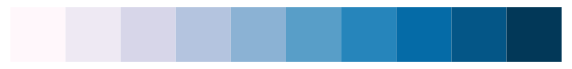

PuBuGn :


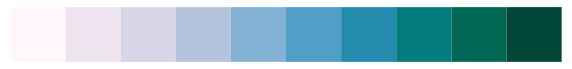

PuOr :


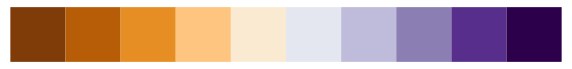

PuRd :


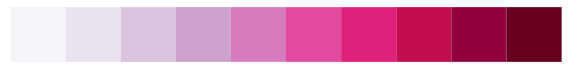

Purples :


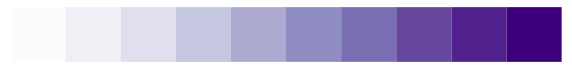

RdBu :


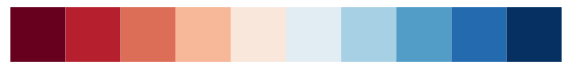

RdGy :


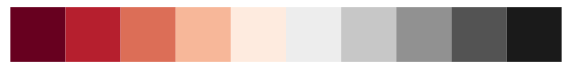

In [62]:
for cmap_key in plt.colormaps()[23:30]:
    print(cmap_key, ':')
    plot_color_grid([mpl.colormaps[cmap_key](s) for s in np.linspace(0, 1.0, 10)])

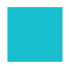

In [64]:
plot_color_grid([mpl.colormaps['tab10'](112)])

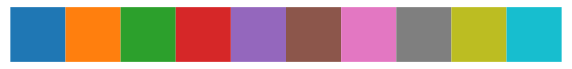

In [65]:
plot_color_grid([mpl.colormaps['tab10'](i) for i in np.linspace(0, 1.0, 10)])

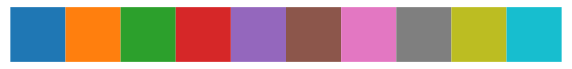

In [66]:
plot_color_grid([mpl.colormaps['tab10'](i) for i in range(0, 10, 1)])

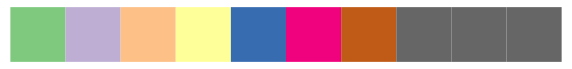

In [67]:
plot_color_grid([mpl.colormaps['Accent'](i) for i in range(0, 10, 1)])

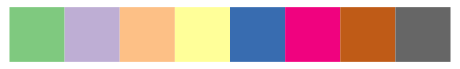

In [89]:
# all colors from a qualitative colormap:
plot_color_grid([plt.cm.Accent(i) for i in range(plt.cm.Accent.N)])

In [91]:
# Generate sample data
np.random.seed(42)  # For reproducibility
n_points = 100

# Two continuous numerical variables for x and y
x = np.random.normal(loc=0, scale=1, size=n_points)
y = x + np.random.normal(loc=0, scale=1, size=n_points)

# Third variable: categorical with values 1, 2, 3
categories = np.random.randint(1, 4, size=n_points)  # Values 1, 2, or 3

# Fourth variable: continuous numerical
continuous_var = np.random.uniform(0, 10, size=n_points)

In [102]:
from mpl.colors import ListedColormap

# Create a 1x3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Scatter Plot Coloring Examples', fontsize=16)

# Plot 1: Single color for all points
axes[0].scatter(x, y, color='blue', s=100, alpha=0.7)
axes[0].set_title('1. Single Color for All Points')
axes[0].set_xlabel('X Variable')
axes[0].set_ylabel('Y Variable')
axes[0].grid(True, alpha=0.3)

# Plot 2: Categorical variable mapped to colors
# Use just the first 3 colors from the 'Accent' colormap
accent_colors = plt.cm.Accent(np.linspace(0, 1, 8))[:3]  # Get first 3 colors from Accent
cat_cmap = ListedColormap(accent_colors)

scatter2 = axes[1].scatter(x, y, c=categories, cmap=cat_cmap, 
                         s=100, alpha=0.7, vmin=1, vmax=3)
axes[1].set_title('2. Categorical Variable (1, 2, 3) Mapped to Colors')
axes[1].set_xlabel('X Variable')
axes[1].set_ylabel('Y Variable')
axes[1].grid(True, alpha=0.3)

# Create a colorbar with discrete ticks for the categories
cbar2 = plt.colorbar(scatter2, ax=axes[1], ticks=[1.33, 2, 2.67])
cbar2.set_label('Category')
cbar2.set_ticklabels(['Category 1', 'Category 2', 'Category 3'])

# Plot 3: Continuous variable mapped to colors
scatter3 = axes[2].scatter(x, y, c=continuous_var, cmap='viridis', 
                         s=100, alpha=0.7)
axes[2].set_title('3. Continuous Variable Mapped to Colors')
axes[2].set_xlabel('X Variable')
axes[2].set_ylabel('Y Variable')
axes[2].grid(True, alpha=0.3)

# Add a colorbar for the continuous variable
cbar3 = plt.colorbar(scatter3, ax=axes[2])
cbar3.set_label('Continuous Variable Value')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Bonus plot: Combined visualization showing both categorical and continuous variables
plt.figure(figsize=(10, 8))

# Use categorical variable for colors and continuous variable for size
scatter = plt.scatter(x, y, c=categories, cmap=cat_cmap, 
                     s=continuous_var*20, alpha=0.7, vmin=1, vmax=3)

plt.title('Combined Visualization: Colors (Categories) and Sizes (Continuous Variable)')
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.grid(True, alpha=0.3)

# Create a colorbar with discrete ticks for the categories
cbar = plt.colorbar(scatter, ticks=[1.33, 2, 2.67])
cbar.set_label('Category')
cbar.set_ticklabels(['Category 1', 'Category 2', 'Category 3'])

# Add a legend for the size scale
sizes = [2, 5, 8]
labels = ['Low', 'Medium', 'High']
handles = []
for size in sizes:
    handles.append(plt.scatter([], [], c='gray', s=size*20, alpha=0.7))
plt.legend(handles, labels, title="Continuous Variable", loc="upper left")

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'mpl'

## Challenge: How many visual variables can we manage in a graph?
We use a cars dataset:

In [103]:
df = pd.read_csv(os.path.join(data_folder, 'motortrends', 'mtcars.csv'), delimiter=',')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


**To Do: Assign the Variable Types**
* model (name of the car model): categorical/nominal
* mpg (fuel efficiency in miles/(US) gallon): numerical/continuous
* cyl (number of cylinders): numerical/discrete
* disp (displacement in cubic inches): numerical/continuous
* hp (horsepower): numerical/continuous
* drat (rear axle ratio): numerical/continuous
* wt (weight in 1000 lbs): numerical/continuous
* qsec (acceleration in 1/4 mile per sec^2): numerical/continuous
* vs (engine type 0=V-shaped, 1=straight): categorical/nominal
* am (transmission 0=automatic, 1=manual): categorical/nominal
* gear (number of forward gears): numerical/discrete
* carb (number of carburators): numerical/discrete

**To Do: Create a scatterplot using matplotlib that shows fuel efficiency in relation to displacement**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define marker styles for different cylinder counts
marker_dict = {4: 'o', 6: 's', 8: '^'}  # circle for 4, square for 6, triangle for 8

# Create figure
plt.figure(figsize=(12, 8))

# Plot each cylinder group separately
for cyl in sorted(df['cyl'].unique()):
    mask = df['cyl'] == cyl
    scatter = plt.scatter(df.loc[mask, 'disp'],
                          df.loc[mask, 'mpg'],
                          c=df.loc[mask, 'hp'],
                          s=df.loc[mask, 'wt'] * 50,
                          alpha=0.8,
                          cmap='RdYlGn_r',  # Changed colormap to RdYlGn_r
                          marker=marker_dict[cyl],
                          label=f'{cyl} cylinders')

plt.title('Fuel Efficiency vs. Displacement', fontsize=12)
plt.xlabel('Displacement (cubic inches)', fontsize=10)
plt.ylabel('Fuel Efficiency (mpg)', fontsize=10)
plt.grid(True, alpha=0.3)

# Add legend (including marker size explanation)
plt.legend(title='Cylinders', title_fontsize='large', fontsize='medium')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Horsepower')
cbar.set_alpha(1)
cbar.draw_all()

# Add text explanation
plt.text(0.65, 0.98, 'Marker size represents weight',
         transform=plt.gca().transAxes,
         fontsize=8,
         verticalalignment='top')

plt.tight_layout()
plt.show()

AttributeError: 'Colorbar' object has no attribute 'draw_all'

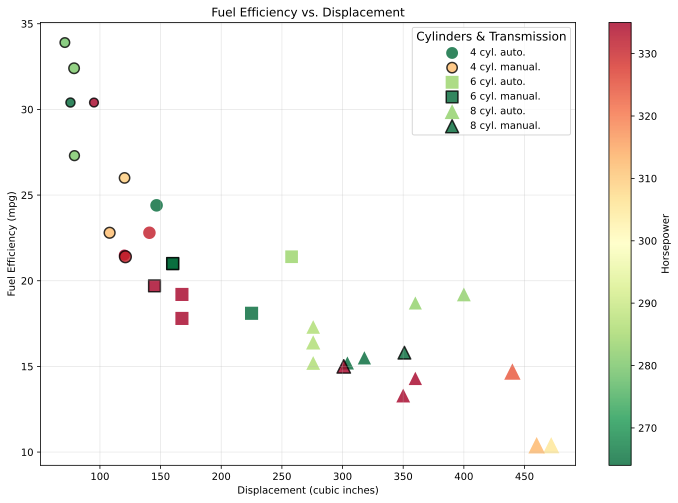

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Define marker styles for different cylinder counts
marker_dict = {4: 'o', 6: 's', 8: '^'}  # circle for 4, square for 6, triangle for 8

# Create figure
plt.figure(figsize=(12, 8))

# Plot each combination of cylinder count and transmission type
for cyl in sorted(df['cyl'].unique()):
    for am in [0, 1]:  # 0 for automatic, 1 for manual
        mask = (df['cyl'] == cyl) & (df['am'] == am)
        scatter = plt.scatter(df.loc[mask, 'disp'],
                              df.loc[mask, 'mpg'],
                              c=df.loc[mask, 'hp'],
                              s=df.loc[mask, 'wt'] * 50,
                              alpha=0.8,
                              cmap='RdYlGn_r',
                              marker=marker_dict[cyl],
                              label=f'{cyl} cyl. {"manual" if am else "auto"}.',
                              edgecolors=['black' if am else (0,0,0,1)],  # solid black for manual, dashed for auto
                              linestyles=['-' if am else '--'],
                              linewidth=1.5)

plt.title('Fuel Efficiency vs. Displacement', fontsize=12)
plt.xlabel('Displacement (cubic inches)', fontsize=10)
plt.ylabel('Fuel Efficiency (mpg)', fontsize=10)
plt.grid(True, alpha=0.3)

# Add legend (including marker size explanation and border style)
plt.legend(title='Cylinders & Transmission', title_fontsize='large', fontsize='medium')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Horsepower')
cbar.set_alpha(1)
cbar.draw_all()

# Add text explanation
plt.text(0.55, 0.98, 'Marker size represents weight',
         transform=plt.gca().transAxes,
         fontsize=8,
         verticalalignment='top')

plt.tight_layout()
plt.show()

**To Do: How many additional variables do you manage to fit into the graph? Which ones?**